In [28]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [44]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [46]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [47]:
env.action_space

Discrete(7)

In [48]:
env.observation_space.shape

(240, 256, 3)

In [49]:
env.action_space.sample()

2

In [13]:
#Here we'll check whether we the mario enviroment is functioning
#also we'll try to maximise our result so that we'll use the Reinforcement learning method
done = True
for step in range(100000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

C:\Users\nemes\AppData\Local\Programs\Python\Python310\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\nemes\AppData\Local\Programs\Python\Python310\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [14]:
env.close()

In [41]:
state = env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [47]:
#Here by changing the second input between 0 to 3 in the below step to access the current state,reward and other info
env.step(1)[3]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

In [34]:
from matplotlib import pyplot as plt
from gym.wrappers import FrameStack
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from gym.wrappers import GrayScaleObservation

In [35]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [36]:
state=env.reset()

In [37]:
state, reward, done, info = env.step([5])

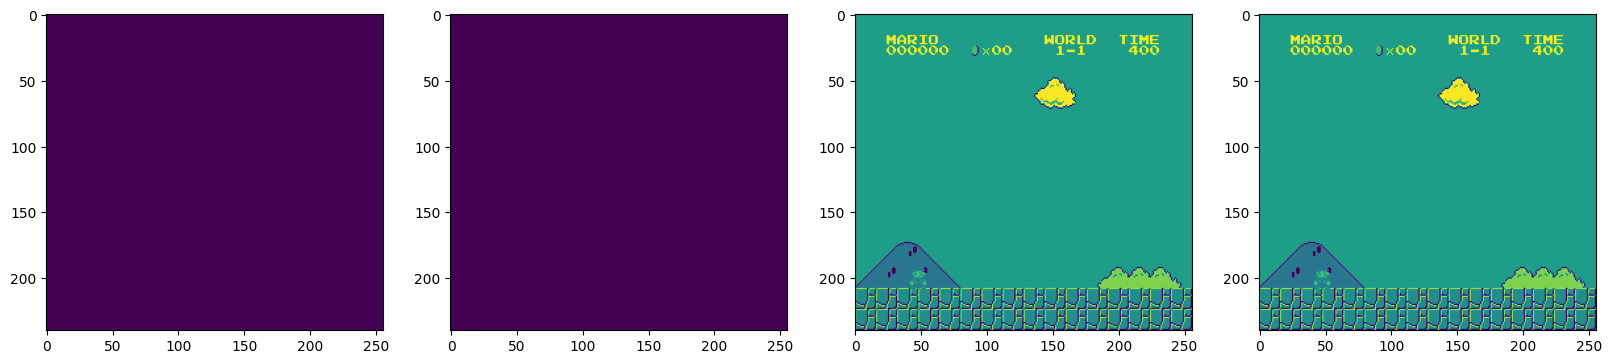

In [38]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [39]:
import os 
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [13]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [14]:
#Creating a point where to save our trained data
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [15]:
#Making to save it at and interval of 10000 time_steps
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [16]:
#By using PPO algo as it is most suitablen for training with the help of images and frames
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [17]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_3


C:\Users\nemes\AppData\Local\Programs\Python\Python310\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 161 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 112         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 8.42032e-06 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.95       |
|    explained_variance   | 6.6e-05     |
|    learning_rate        | 1e-06       |
|    loss                 | 286         |
|    n_updates            | 10          |
|    policy_gradient_loss | -5.33e-05   |
|    value_loss           | 596         |
-----------------------------------------
-----------------------------------------

In [18]:
#Saving our model
model.save('10lakhmodel')

In [40]:
#Now we can load any data we need from the trained path
model = PPO.load('./train/best_model_1000000')

In [41]:
state = env.reset()

In [42]:
#Let's get ready to see the final output
state = env.reset()
while True: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

In [43]:
env.close()